In [88]:
import pandas as pd
from pathlib import Path

In [89]:
# Use pathlib to set the relative file path
file_path = Path(r'..\Data\national_cousub2020.txt')

# Read the TSV file into a DataFrame
original_df = pd.read_csv(file_path, sep='|', dtype=str)  # Use '|' as a delimiter for TSV

# Display the first few rows of the DataFrame
original_df

,STATE,STATEFP,COUNTYFP,COUNTYNAME,COUSUBFP,COUSUBNS,COUSUBNAME,CLASSFP,FUNCSTAT
0,AL,01,001,Autauga County,90171,00161593,Autaugaville CCD,Z5,S
1,AL,01,001,Autauga County,90315,00165647,Billingsley CCD,Z5,S
2,AL,01,001,Autauga County,92106,00165648,Marbury CCD,Z5,S
3,AL,01,001,Autauga County,92628,00165649,Prattville CCD,Z5,S
4,AL,01,003,Baldwin County,90207,00161594,Bay Minette CCD,Z5,S
...,...,...,...,...,...,...,...,...,...
36635,VI,78,030,St. Thomas Island,61300,01939766,Northside subdistrict,Z5,N
36636,VI,78,030,St. Thomas Island,74800,01939770,Southside subdistrict,Z5,N
36637,VI,78,030,St. Thomas Island,78400,01939772,Tutu subdistrict,Z5,N
36638,VI,78,030,St. Thomas Island,82000,01939773,Water Island subdistrict,Z5,N


In [90]:
#Extract necessary columns
new_df = original_df[['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'STATE']]

#Display
new_df.head()

,STATEFP,COUNTYFP,COUNTYNAME,STATE
0,01,001,Autauga County,AL
1,01,001,Autauga County,AL
2,01,001,Autauga County,AL
3,01,001,Autauga County,AL
4,01,003,Baldwin County,AL


In [102]:
# Create an explicit copy first
new_df = original_df[['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'STATE']].copy()

# Now concatenate the columns
new_df['FIPS'] = new_df['STATEFP'].astype(str) + new_df['COUNTYFP'].astype(str)

,STATEFP,COUNTYFP,COUNTYNAME,STATE,FIPS
0,01,001,Autauga County,AL,01001
1,01,001,Autauga County,AL,01001
2,01,001,Autauga County,AL,01001
3,01,001,Autauga County,AL,01001
4,01,003,Baldwin County,AL,01003
...,...,...,...,...,...
36635,78,030,St. Thomas Island,VI,78030
36636,78,030,St. Thomas Island,VI,78030
36637,78,030,St. Thomas Island,VI,78030
36638,78,030,St. Thomas Island,VI,78030


In [105]:
# Drop duplicates and reset index
fips_df = new_df[['FIPS', 'COUNTYNAME', 'STATE']].drop_duplicates(keep='first').reset_index(drop=True)

In [108]:
#Display the table
fips_df

,FIPS,COUNTYNAME,STATE
0,01001,Autauga County,AL
1,01003,Baldwin County,AL
2,01005,Barbour County,AL
3,01007,Bibb County,AL
4,01009,Blount County,AL
...,...,...,...
3230,72153,Yauco Municipio,PR
3231,74300,Midway Islands,UM
3232,78010,St. Croix Island,VI
3233,78020,St. John Island,VI


In [109]:
#Save to csv
fips_df.to_csv('fips_data.csv', index=False)

In [115]:
state_df = original_df[['STATEFP', 'STATE']].drop_duplicates(keep='first').reset_index(drop=True)

state_df.head()

,STATEFP,STATE
0,01,AL
1,02,AK
2,04,AZ
3,05,AR
4,06,CA


In [113]:
state_df.to_csv('state_date.csv', index=False)

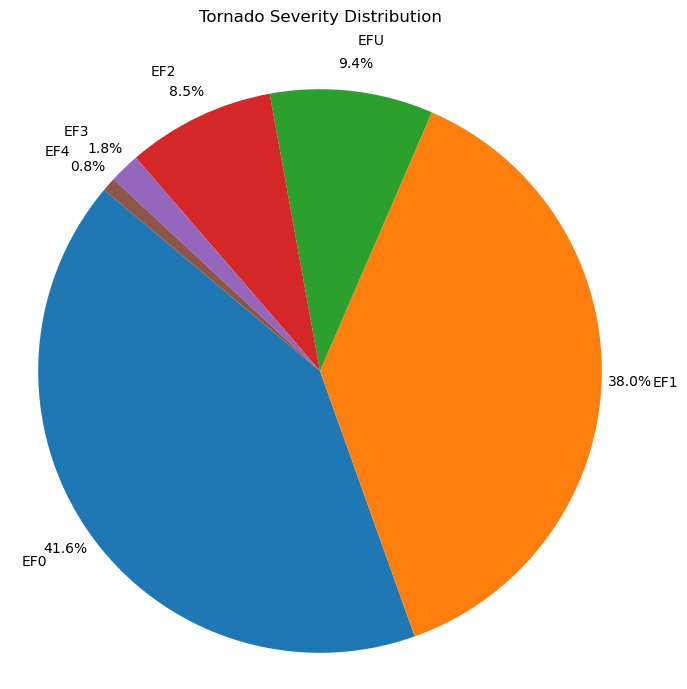

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetch data from the API endpoint
response = requests.get('http://127.0.0.1:5000/api/v1.0/events?start_year=2020&duration=1')
data = response.json()

# Convert the JSON data to a Pandas DataFrame
df = pd.DataFrame(data)

# Assume the tornado severity is stored in a column named 'SEVERITY'
# Count the occurrences of each severity level
severity_counts = df['TOR_F_SCALE'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=1.18)
plt.title('Tornado Severity Distribution', pad=30)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()